# IMG_4485

- **findContours‚á® contours, hierarchy**

<div align='left'><img src="contour_explain.png" width="50%"></div>

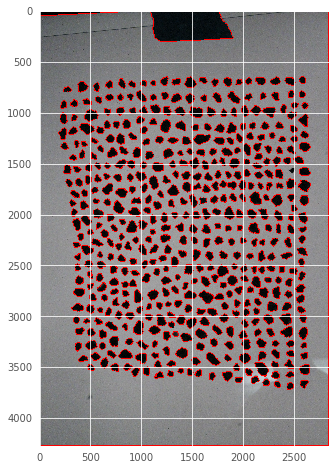

In [19]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 17:38:06 2020

@author: sayaka71
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


# „Ç∞„É©„ÉïÊèèÁîª„ÅÆÈñ¢Êï∞ÂÆöÁæ©
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

# „Ç∞„É¨„ÉºÁîªÂÉè
img = cv2.imread('IMG_4485.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# Â§ßÊ¥•Ê≥ï„Åß2ÂÄ§Âåñ ret„ÅØboolÂÄ§
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# „Éé„Ç§„Ç∫„ÇíÊ∂à„Åô
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)

# Á¢∫ÂÆü„Å™ËÉåÊôØ
sure_bg = cv2.dilate(opening,kernel,iterations=5)

# --- Ë∑ùÈõ¢Â§âÊèõ„ÄÄÔºà„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„Å®ËÉåÊôØ„ÅÆË∑ùÈõ¢„ÇíÂá∫„ÅôÔºâ ---
# ÈñæÂÄ§ÔºàË∑ùÈõ¢Â§âÊèõ„ÅßÂæó„Çâ„Çå„ÅüÂÄ§„ÅÆÊúÄÂ§ßÂÄ§√ó0.2Ôºâ ‚Üê„Åì„Åì„ÇíË™øÁØÄÔºÅ
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.08*dist_transform.max(), 255, 0)

# Ë∑ùÈõ¢Â§âÊèõ„ÅÆÁµêÊûú„Åã„ÇâÁ¢∫ÂÆü„Å™ÂâçÊôØ„Çí
sure_fg = np.uint8(sure_fg)

# ÂâçÊôØ„Åß„ÇÇÂæåÊôØ„Åß„ÇÇ„Å™„ÅÑUnknown
unknown = cv2.subtract(sure_bg,sure_fg)


# „Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„Åî„Å®„Å´„É©„Éô„É´„Çí„Å§„Åë„Çã
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

# markers„Éá„Éº„Çø„Çí„ÇÇ„Å®„Å´watershed
markers = cv2.watershed(img, markers)

# contours(Ëº™ÈÉ≠), hierarchy(ÈöéÂ±§ÔºåË¶™Â≠ê)
contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        # Â¢ÉÁïå„ÇíËµ§Ëâ≤„ÅßÊèè„Åè  (255, 0,„ÄÄ0)Ôºö color red,  5pt line
        cv2.drawContours(img, contours, i, (255, 0, 0), 5)
        
display(img)

In [20]:
len(contours)

971

In [21]:
# Â§ñ„ÇåÂÄ§„ÇídeleteÔºà„ÅÇ„Å®„ÅßÂ§ñ„ÇåÂÄ§„Åå„Çè„Åã„Çã„Åë„Å©ÂÖà„Å´ÂâäÈô§„Åó„Å®„ÅèÔºâ
# contours = np.delete(contours, 1678,0)
contours = np.delete(contours, -1,0)
contours = np.delete(contours, 969,0)
contours = np.delete(contours, 968,0)

OpenCVÂÖ¨Âºè„Çµ„Ç§„Éà‚á® [Moment](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html)

In [22]:
from math import sqrt, pi ,acos
from tqdm import tqdm
from scipy.spatial import distance

# Á≤íÂ≠ê„ÅÆÂΩ¢Áä∂„ÇíÊ∏¨ÂÆö
Areas = []
Perimeters = []
Circularities = []
Eq_diameters = []
Longest = []
Shortest = []
Distance_Gomez = []
degrees = np.arange(0, 2*pi, 2*pi/36) # degrees: 10Â∫¶„Åö„Å§„ÅßÂõû„Åô (2pi/36 = 10deg)

for cnt in tqdm(contours):
    # Èù¢Á©ç (px*px)
    area = cv2.contourArea(cnt)
    Areas.append(area)
    
    # Âë®Âõ≤Èï∑(perimeter)
    arc = cv2.arcLength(cnt, True)
    Perimeters.append(arc)
    # ÂÜÜÂΩ¢Â∫¶(circularity)
    circularity = 4 * np.pi * area/(arc*arc)
    Circularities.append(circularity)
    
    # Á≠â‰æ°Áõ¥ÂæÑ(px)
    eq_diameter = np.sqrt(4 * area/np.pi)
    Eq_diameters.append(eq_diameter)
    
    # ÈáçÂøÉ(Moment)
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    # ÈáçÂøÉ„Åã„ÇâËº™ÈÉ≠„Åæ„Åß„ÅÆË∑ùÈõ¢ (Distance_Gomez)
    for deg in degrees:
        for cnts in cnt:
            # cnt„ÅÆ(x,y)Â∫ßÊ®ô
            x = cnts[0,0]
            y = cnts[0,1]
            # „É¶„Éº„ÇØ„É™„ÉÉ„ÉâË∑ùÈõ¢
            d_eu = distance.euclidean((x,y), (cx,cy))
            # ÊåáÂÆöËßíÂ∫¶„ÅÆÊñπÂêë„Å´„ÅÇ„ÇãËº™ÈÉ≠„ÅÆÁÇπ„ÇíÊ±Ç„ÇÅ„ÇãË™§Â∑Æ1Â∫¶„Åæ„Åß ( |acos(x-cx) / d_eu| < 1 degree )
            if abs(acos((x-cx)/d_eu) - deg) < pi/360:
                break
            else:
                continue
        # scaling
        d_eu_scaled = d_eu/eq_diameter
        Distance_Gomez.append(d_eu_scaled)
    # Ellipse - shortest, longest ax
    ellipse = cv2.fitEllipse(cnt)
    Shortest.append(ellipse[1][0])
    Longest.append(ellipse[1][1])
            
        

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 968/968 [01:18<00:00, 12.33it/s]


36.0
n = 5.0


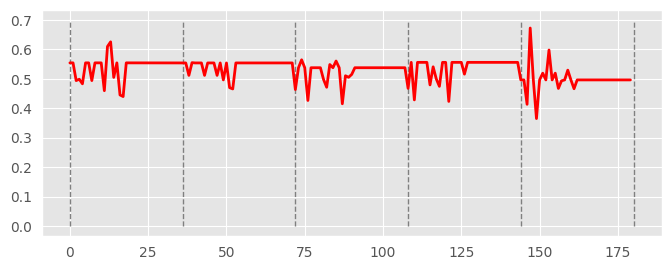

In [23]:
# plot distance (n=5)
print(len(Distance_Gomez)/len(contours))
print(f'n = {len(Distance_Gomez[:180])/36}')

# plot
plt.figure(figsize=(8,3), dpi=100)
plt.plot(np.arange(len(Distance_Gomez[:180])), Distance_Gomez[:180], c='r', lw=2)
# ÂûÇÁõ¥Á∑ö vline
vline = np.arange(0, 181, 36)
for i in vline:
    plt.vlines([i], 0, 0.7, 'gray', linestyle='dashed', lw=1)

Text(0.5, 1.0, 'Distance (All)')

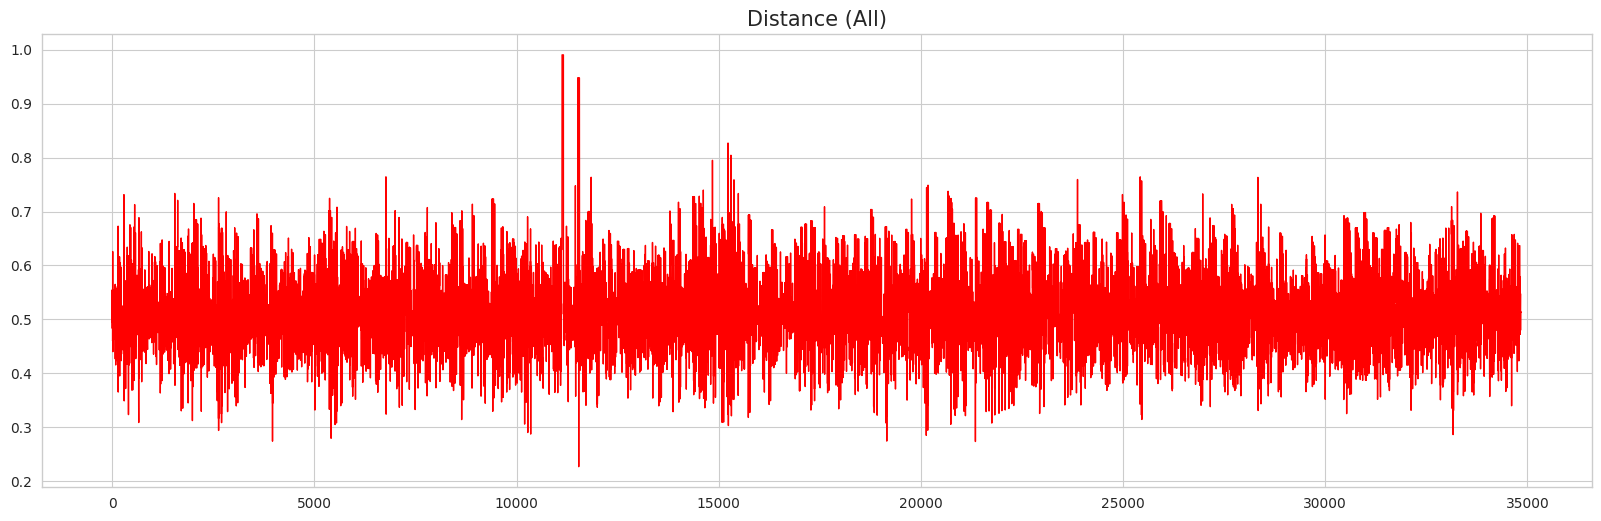

In [24]:
# Distance
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(20,6), dpi=100)
plt.plot(np.arange(len(Distance_Gomez)), Distance_Gomez, c='r', lw=1)
plt.title('Distance (All)', {'fontsize':15})

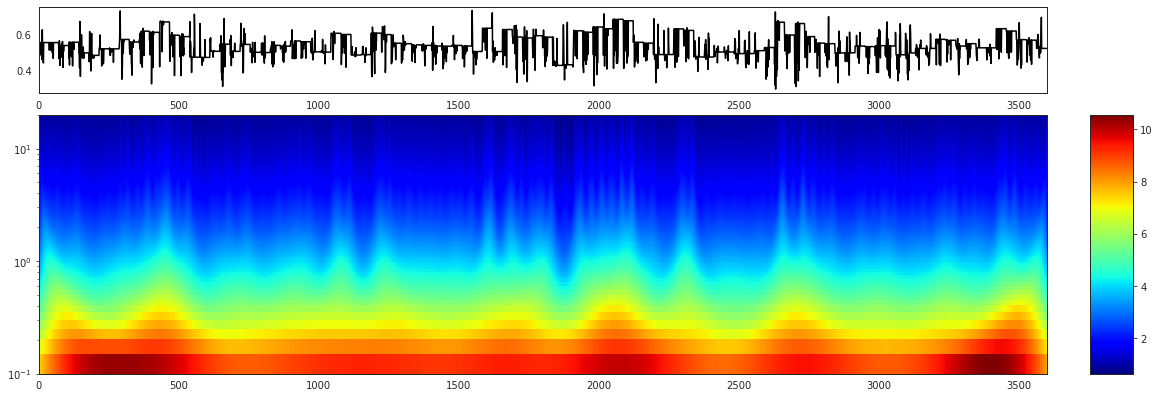

In [25]:
# morlet wavelet n=100 (n=3600/36), omega=0.2

sns.set_style('white')
from swan import pycwt
x = np.arange(len(Distance_Gomez[:3600]))
y = Distance_Gomez[:3600]
              
Fs = 1/0.01
omega0 = 0.2

# (1)„ÄÄFreq„ÇíÊåáÂÆö„Åó„Å¶cwt
freqs=np.arange(0.1,10,0.025)
r=pycwt.cwt_f(y,freqs,Fs,pycwt.Morlet(omega0))
rr=np.abs(r)


plt.rcParams['figure.figsize'] = (20, 6)
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2])
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

ax1.plot(x, y, 'k')

img = ax2.imshow(np.flipud(rr), extent=[0, 3600,0.1, 20], aspect='auto', cmap='jet') 
twin_ax = ax2
twin_ax.set_yscale('log')
twin_ax.set_xlim(0, 3600)
twin_ax.set_ylim(0.1, 20)
ax2.tick_params(which='both', labelleft=False, left=False)
twin_ax.tick_params(which='both', labelleft=True, left=True, labelright=False)
fig.colorbar(img, cax=ax3)
plt.show()

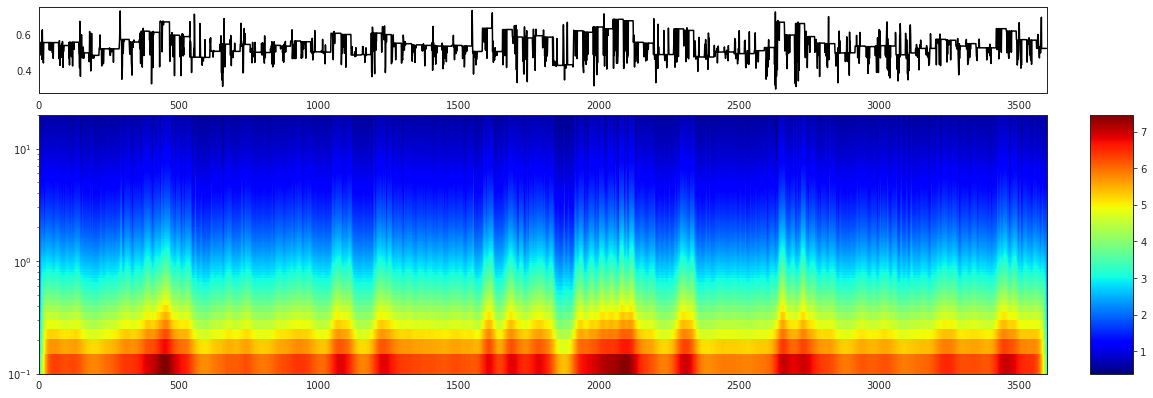

In [26]:
# morlet wavelet n=100 (n=3600/36), omega=0.02

sns.set_style('white')
from swan import pycwt
x = np.arange(len(Distance_Gomez[:3600]))
y = Distance_Gomez[:3600]
              
Fs = 1/0.01
omega0 = 0.02

# (1)„ÄÄFreq„ÇíÊåáÂÆö„Åó„Å¶cwt
freqs=np.arange(0.1,10,0.025)
r=pycwt.cwt_f(y,freqs,Fs,pycwt.Morlet(omega0))
rr=np.abs(r)


plt.rcParams['figure.figsize'] = (20, 6)
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2])
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

ax1.plot(x, y, 'k')

img = ax2.imshow(np.flipud(rr), extent=[0, 3600,0.1, 20], aspect='auto', cmap='jet') 
twin_ax = ax2
twin_ax.set_yscale('log')
twin_ax.set_xlim(0, 3600)
twin_ax.set_ylim(0.1, 20)
ax2.tick_params(which='both', labelleft=False, left=False)
twin_ax.tick_params(which='both', labelleft=True, left=True, labelright=False)
fig.colorbar(img, cax=ax3)
plt.show()

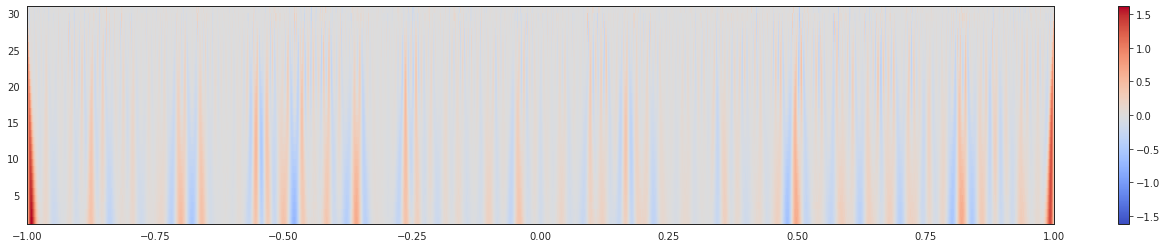

In [27]:
# wavenet n=200 (mexican hatüëí)
import pywt
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(Distance_Gomez[:7200], widths, 'mexh')
sns.set_style('white')
plt.figure(figsize=(23, 4))
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='coolwarm', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.colorbar();

## DataFrame

In [28]:
import pandas as pd
df = pd.DataFrame({'Areas(px^2)': Areas, 'Circularity': Circularities, 'Equal Diameters(px)': Eq_diameters, 'Shortest Axis(px)': Shortest, 'Longest Axis(px)': Longest, 'Perimeters(px)': Perimeters})

In [29]:
df.head()

Areas(px^2)  Circularity  Equal Diameters(px)  Shortest Axis(px)  \
0       3282.0     0.772936            64.643423          60.356750   
1       3694.0     0.790622            68.580951          63.726017   
2       2662.0     0.792278            58.218242          50.919910   
3       3018.0     0.806928            61.989007          54.219162   
4       4058.0     0.652471            71.880499          69.126724   

   Longest Axis(px)  Perimeters(px)  
0         73.488350      230.994947  
1         76.986046      242.308656  
2         67.359329      205.480229  
3         71.325768      216.793937  
4         82.447632      279.563489

In [30]:
# Â§ñ„ÇåÂÄ§
# df.loc[df['Longest Length(px)'] > 700]
# >>> 1678, 1341
# df.loc[df['Perimeters(px)'] > 1000]

In [31]:
# df.loc[df['Circularity'] < 0.6]

In [32]:
# df.drop(1678,axis=0, inplace=True)
# df.drop(1341,axis=0, inplace=True)
# df.drop([32,33,66,67,76,78,130,131,132,133], inplace=True)
# df.drop([968,969],axis=0, inplace=True)

In [33]:
df.describe()

Areas(px^2)  Circularity  Equal Diameters(px)  Shortest Axis(px)  \
count    968.000000   968.000000           968.000000         968.000000   
mean    4483.009298     0.739313            74.043404          65.960143   
std     1886.865243     0.051917            15.025056          13.591798   
min        4.000000     0.269506             2.256758           7.211102   
25%     3180.375000     0.713344            63.634732          56.620282   
50%     3903.750000     0.747730            70.501126          63.307178   
75%     5281.625000     0.772691            82.004699          72.873383   
max    12096.000000     0.844167           124.101191         111.615166   

       Longest Axis(px)  Perimeters(px)  
count        968.000000      968.000000  
mean          87.579139      271.049716  
std           20.052268       56.747980  
min            7.211102       13.656854  
25%           73.457632      230.919569  
50%           82.829128      257.764499  
75%           99.932352      302.871101  
max          169.492432      475.587874

sample number = 968



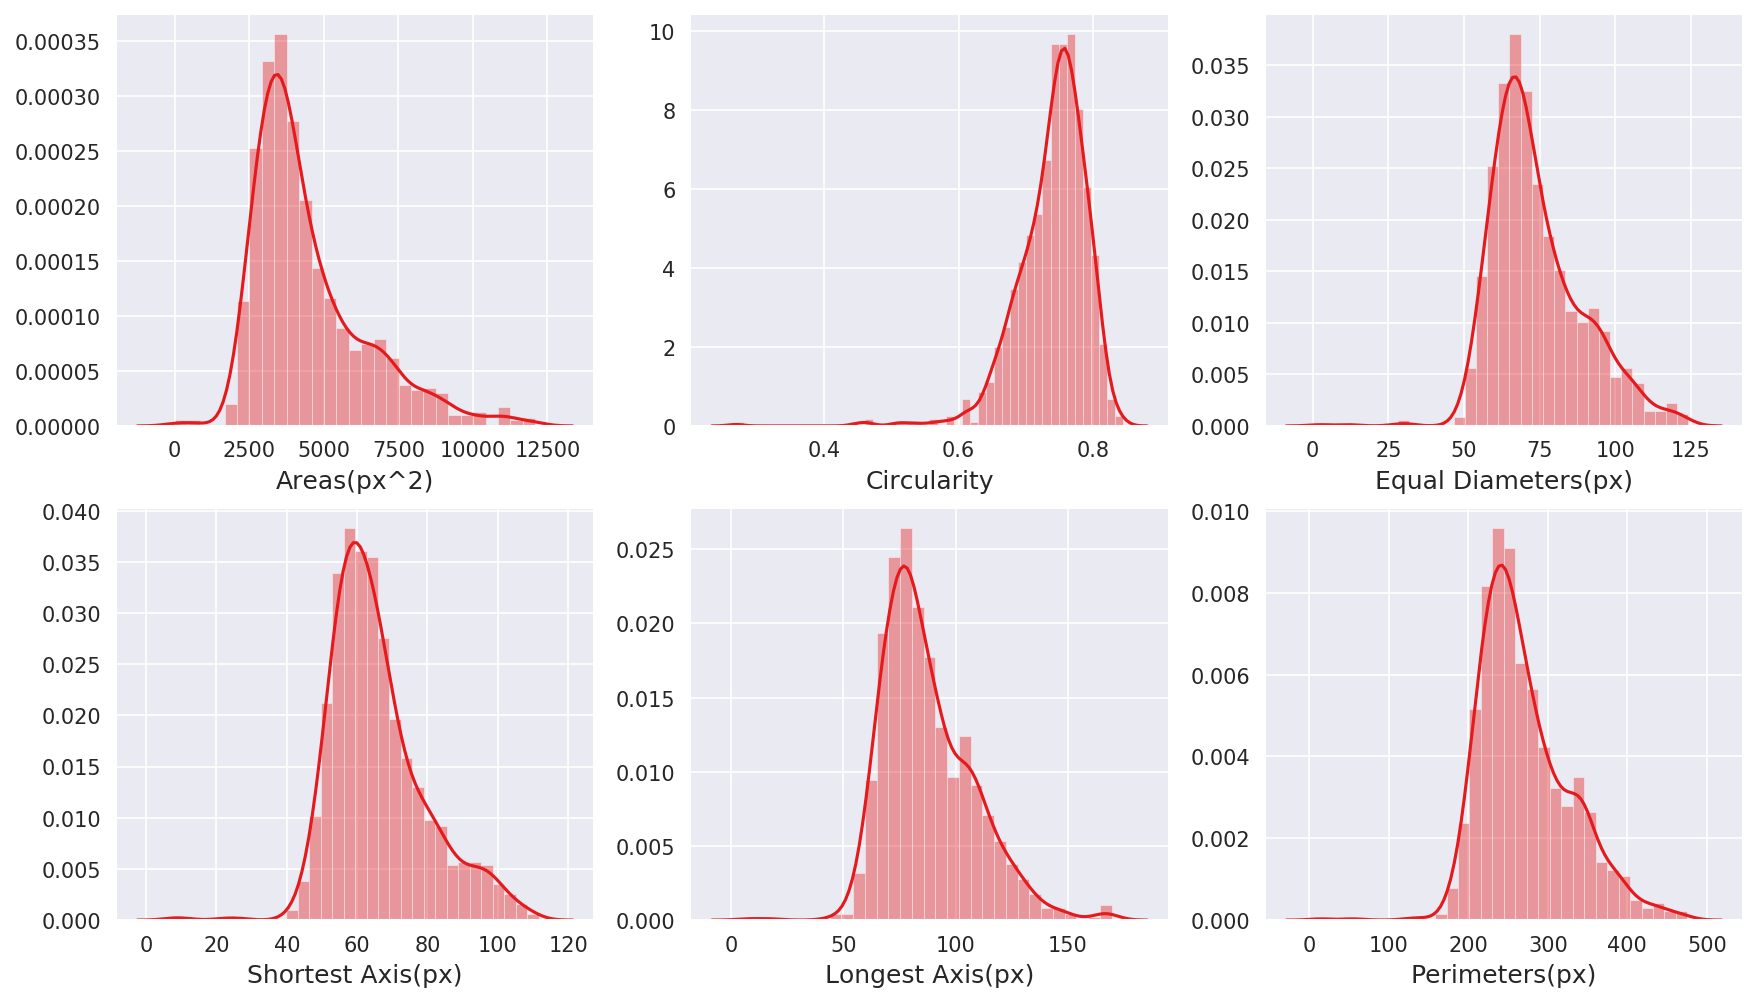

In [34]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Set1')
print('sample number = {}\n'.format(len(contours)))
fig, ax = plt.subplots(2,3,figsize=(14,8), dpi=150)

sns.distplot(df['Areas(px^2)'], ax=ax[0,0])
sns.distplot(df['Circularity'], ax=ax[0,1])
sns.distplot(df['Equal Diameters(px)'], ax=ax[0,2])
sns.distplot(df['Shortest Axis(px)'], ax=ax[1,0])
sns.distplot(df['Longest Axis(px)'], ax=ax[1,1])
sns.distplot(df['Perimeters(px)'], ax=ax[1,2]);

# Á¢∫ÁéáÂàÜÂ∏É
![distribution](Distribution.png)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, '')

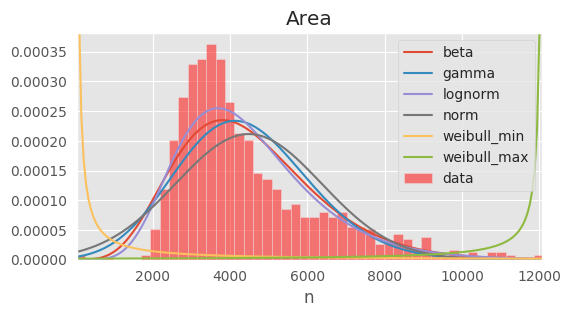

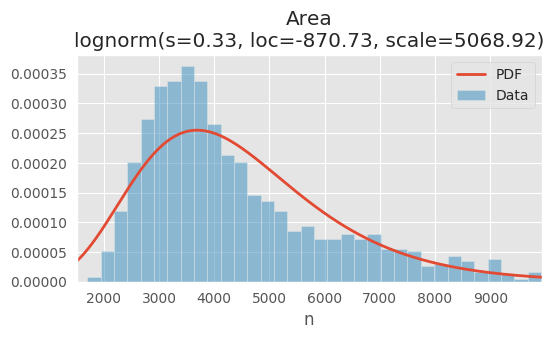

In [35]:
# script„ÅÆÊõ¥Êñ∞„ÇíÂèçÊò†„Åô„Çã„Åä„Åæ„Åò„Å™„ÅÑ
%load_ext autoreload
%autoreload 2

from functions.pdf import best_fit_distribution, make_pdf, find_PDF

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib


matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Load data from statsmodels datasets
data = pd.Series(Areas)

# Plot for comparison
plt.figure(figsize=(6,3), dpi=100)
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='data', legend=True, color='red')
ax.legend(loc='upper right')

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Area')
ax.set_xlabel(u'n')
ax.set_ylabel('')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(6,3), dpi=100)
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Area\n' + dist_str)
ax.set_xlabel(u'n')
ax.set_ylabel('')


In [36]:
# Probability Density Function„Çí„Åù„Çå„Åû„ÇåË¶ã„Å§„Åë„Çã
data_all = [Areas, Circularities, Eq_diameters, Shortest, Longest, Perimeters]
data_name = ['Areas', 'Circularities', 'Eq_diameters', 'Shortest', 'Longest', 'Perimeters']
find_PDF(data_all, data_name)

Areas: lognorm(s=0.33, loc=-870.73, scale=5068.92)
Circularities: weibull_min(c=121261479.61, loc=-4735726.15, scale=4735726.91)
Eq_diameters: lognorm(s=0.10, loc=-70.77, scale=144.06)
Shortest: lognorm(s=0.12, loc=-46.73, scale=111.89)
Longest: lognorm(s=0.15, loc=-40.25, scale=126.33)
Perimeters: gamma(a=47.01, loc=-112.30, scale=8.15)
